In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import visualise as vis
import algorythm as alg
import math
from sklearn.cluster import KMeans
import sklearn
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from   sklearn.metrics import accuracy_score
from   sklearn.metrics import f1_score
from   sklearn.metrics import precision_score
from   sklearn.metrics import recall_score

In [2]:
data = pd.read_csv(r'./dataset/generated1.csv', header=0, sep =',')

In [3]:
clusters = alg.clusterise(data, 6)

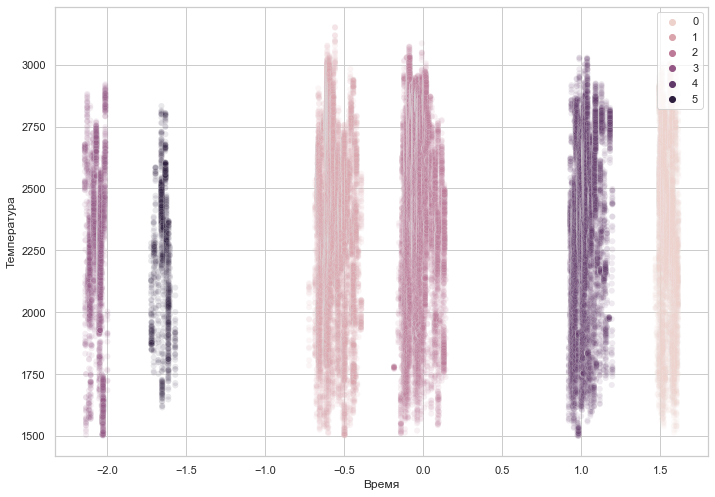

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
plot = sns.scatterplot(data = data, x="ts", y="temperatureAvg",  alpha = 0.1, hue = 'cluster', legend = 'full' )
plot.set_ylabel('Температура')
plot.set_xlabel('Время')
plot.legend(loc='upper right')

In [5]:
def data_vis(data):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plot = sns.scatterplot(data = data, x="id", y="temperatureAvg",  alpha = 0.1)
    plot.set_ylabel('Температура')
    plot.set_xlabel('ID')

In [6]:
clusters = clusters[2:]

ke1k


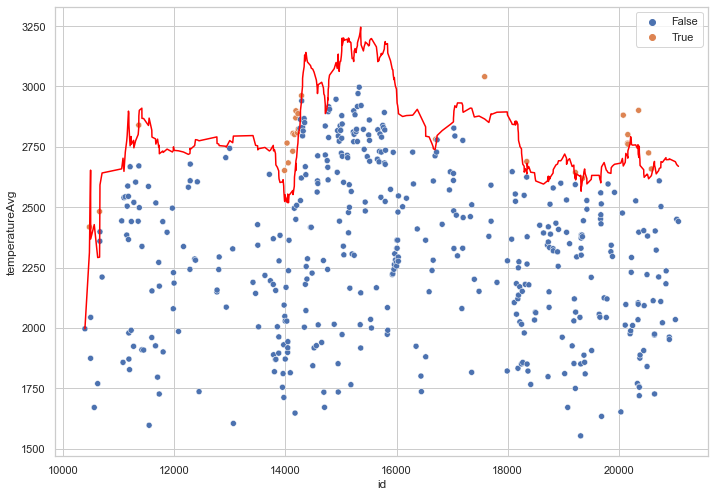

In [7]:
x_ = np.empty((0,16))
y_ = np.empty((0,1))
#fig, axs = plt.subplots(2,2, figsize = (20,13))

data_mean_list = f.mean_list(clusters[0])
data_mean = alg.create_trend_weighted(data_mean_list['temperatureAvg'],len(data_mean_list)//10)
data_sdv = alg.create_sdv_trend(data_mean_list['temperatureAvg'], data_mean,len(data_mean_list)//10)
border = data_mean + 1.5 * data_sdv
data_mean_list['markup'] = data_mean_list['temperatureAvg'] > border
sns.scatterplot(data = data_mean_list, x = 'id', y = 'temperatureAvg', hue = 'markup')
sns.lineplot(x = data_mean_list['id'], y = border, color = 'red')
data_mean_list['temperatureAvg'] -= data_mean_list['temperatureAvg'].mean()
data_mean_list['temperatureAvg'] /= data_mean_list['temperatureAvg'].std()
a,b = f.create_data(data_mean_list, 16)
x_ = np.append(x_,a, axis=0)
y_ = np.append(y_,b)

ke1k


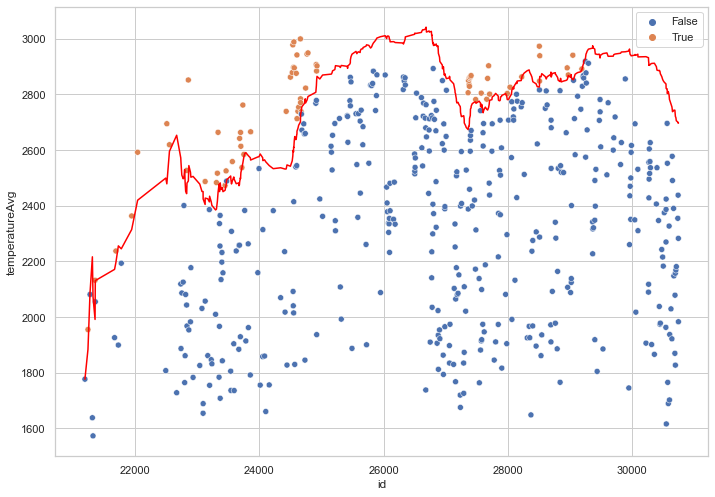

In [8]:
data_mean_list = f.mean_list(clusters[1])
data_mean = alg.create_trend_weighted(data_mean_list['temperatureAvg'],len(data_mean_list)//4)
data_sdv = alg.create_sdv_trend(data_mean_list['temperatureAvg'], data_mean,len(data_mean_list)//5)
border = data_mean + 1.2 * data_sdv
data_mean_list['markup'] = data_mean_list['temperatureAvg'] > border
sns.scatterplot(data = data_mean_list, x = 'id', y = 'temperatureAvg', hue = 'markup')
sns.lineplot(x = data_mean_list['id'], y = border, color = 'red')
data_mean_list['temperatureAvg'] -= data_mean_list['temperatureAvg'].mean()
data_mean_list['temperatureAvg'] /= data_mean_list['temperatureAvg'].std()
a,b = f.create_data(data_mean_list, 16)
x_ = np.append(x_,a, axis=0)
y_ = np.append(y_,b)

ke1k


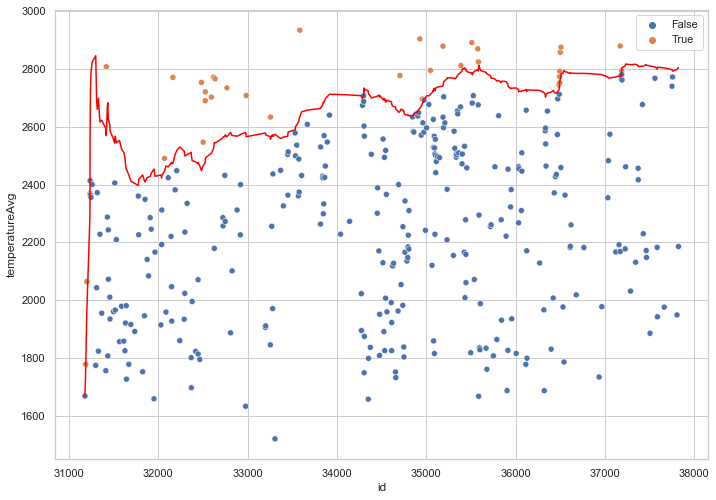

In [9]:
data_mean_list = f.mean_list(clusters[2])
data_mean = alg.create_trend_weighted(data_mean_list['temperatureAvg'],len(data_mean_list)//2)
data_sdv = alg.create_sdv_trend(data_mean_list['temperatureAvg'], data_mean,len(data_mean_list)//5)
border = data_mean + 1.3 * data_sdv
data_mean_list['markup'] = data_mean_list['temperatureAvg'] > border
sns.scatterplot(data = data_mean_list, x = 'id', y = 'temperatureAvg', hue = 'markup')
sns.lineplot(x = data_mean_list['id'], y = border, color = 'red')
data_mean_list['temperatureAvg'] -= data_mean_list['temperatureAvg'].mean()
data_mean_list['temperatureAvg'] /= data_mean_list['temperatureAvg'].std()
a,b = f.create_data(data_mean_list, 16)
x_ = np.append(x_,a, axis=0)
y_ = np.append(y_,b)

ke1k


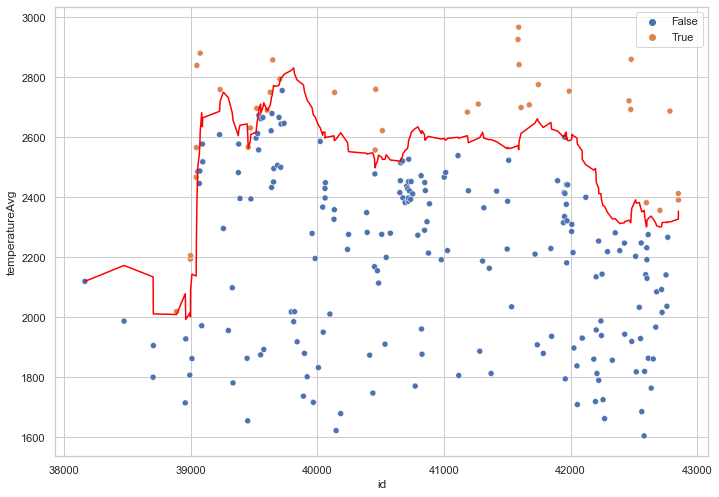

In [10]:
data_mean_list = f.mean_list(clusters[3])
data_mean = alg.create_trend_weighted(data_mean_list['temperatureAvg'],len(data_mean_list)//4)
data_sdv = alg.create_sdv_trend(data_mean_list['temperatureAvg'], data_mean,len(data_mean_list)//2)
border = data_mean + 0.8 * data_sdv
data_mean_list['markup'] = data_mean_list['temperatureAvg'] > border
sns.scatterplot(data = data_mean_list, x = 'id', y = 'temperatureAvg', hue = 'markup')
sns.lineplot(x = data_mean_list['id'], y = border, color = 'red')
data_mean_list['temperatureAvg'] -= data_mean_list['temperatureAvg'].mean()
data_mean_list['temperatureAvg'] /= data_mean_list['temperatureAvg'].std()
a,b = f.create_data(data_mean_list, 16)
x_ = np.append(x_,a, axis=0)
y_ = np.append(y_,b)

In [12]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes= np.unique(y_),y= y_)
class_weights = dict(zip(np.unique(y_), class_weights))
class_weights

{0.0: 0.5565749235474006, 1.0: 4.918918918918919}

In [13]:
x_train, y_train = x_[:1100], y_[:1100]
x_val, y_val = x_[1100:], y_[1100:]

In [14]:
inputs = keras.Input(shape=(16,))
dense_1 = layers.Dense(32, activation = "ReLU")(inputs)
dense_2 = layers.Dense(4, activation = "ReLU")(dense_1)
outputs = layers.Dense(1, activation = "sigmoid")(dense_1)
model = keras.Model(inputs=inputs, outputs=outputs, name="thermal-model")
model.summary()

Model: "thermal-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy", optimizer='RMSprop', metrics='accuracy')
model.save_weights('initial')

In [16]:
model.load_weights('initial')
history = model.fit(x=x_train, y=y_train, validation_data = (x_val, y_val), verbose=1, epochs = 100, class_weight=dict(class_weights))

Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 0.5657 - accuracy: 0.6745 - val_loss: 0.5883 - val_accuracy: 0.7107
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7245 - val_loss: 0.5378 - val_accuracy: 0.7528
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7673 - val_loss: 0.5090 - val_accuracy: 0.7697
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7673 - val_loss: 0.4799 - val_accuracy: 0.7781
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7855 - val_loss: 0.4608 - val_accuracy: 0.7921
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.7818 - val_loss: 0.4321 - val_accuracy: 0.8118
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.7936 - val_loss: 0.4118 - val_accuracy: 0.8202
Epoch 8/100
3

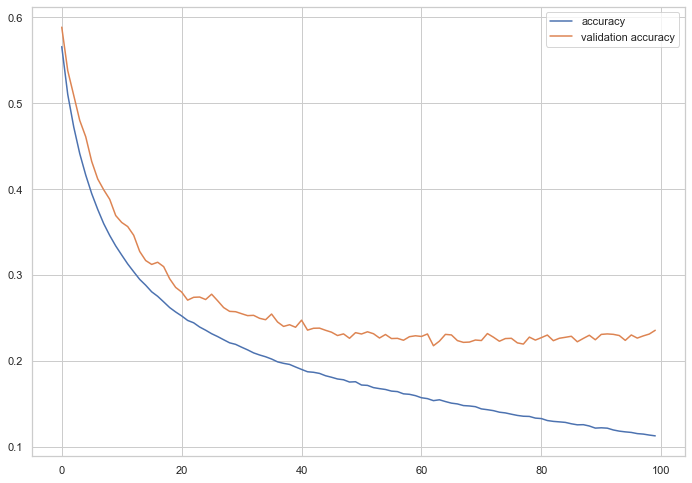

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation accuracy'])

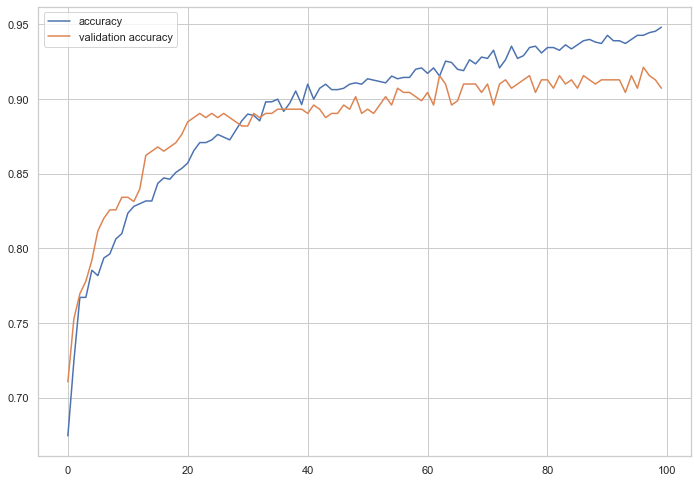

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

In [19]:
prediction = model.predict(x_val)

Text(0, 0.5, 'temperatureAvg -\n температура кадра')

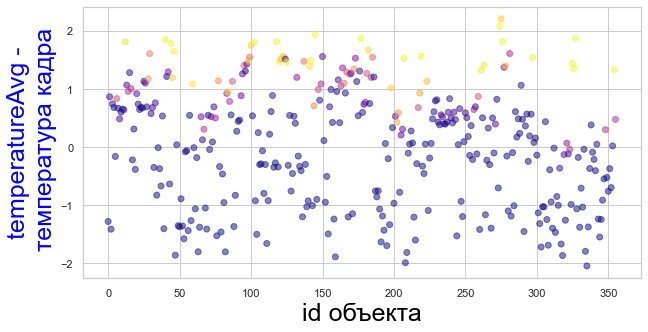

In [20]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(np.arange(start=0, stop=len(prediction)), x_val[:, 0], c=prediction, alpha=0.5, cmap = 'plasma')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')

In [21]:
from sklearn.metrics import confusion_matrix
matrix_preidction = prediction > 0.5
matrix = confusion_matrix(y_val, matrix_preidction)
matrix

array([[290,  22],
       [ 11,  33]], dtype=int64)

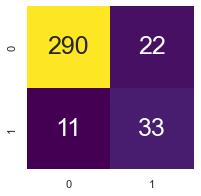

The precision score is: 0.60
The recall score is: 0.75 

Accuracy score is: 0.91
The F1 score is: 0.67


In [22]:
plt.figure(figsize = (3,3))
sns.heatmap(matrix, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()
print("The precision score is: %.2f" % precision_score( y_val, matrix_preidction))
print("The recall score is: %.2f" % recall_score( y_val, matrix_preidction), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_val, matrix_preidction))
print("The F1 score is: %.2f" % f1_score( y_val, matrix_preidction))

In [23]:
sochi = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep=',')
sochi = sochi.loc[sochi['temperatureAvg'] > 1]
sochi = sochi.loc[sochi['id'] > 1]
sochi = sochi.loc[sochi['temperatureAvg'] < 3500]

model_ = f.Model(sochi, 10)
model_.filter(2)
sochi = model_.df_all

In [24]:
data_mean_list_sochi = f.mean_list(sochi)
data_mean_list_sochi

,id,temperatureAvg,tempreratureSdv
0,914,2018.524545,718.250427
1,918,1982.808500,697.175250
2,932,3193.389823,263.420255
3,936,3185.660058,268.071712
4,940,3132.967796,301.055737
5,941,3181.980833,277.200339
6,942,3195.707476,279.722162
7,943,3218.839056,278.082233
8,944,3229.185434,248.867225
9,945,3185.500427,276.858847


In [25]:
data_mean_list_sochi['temperatureAvg'] -= data_mean_list_sochi['temperatureAvg'].mean()
data_mean_list_sochi['temperatureAvg'] /= data_mean_list_sochi['temperatureAvg'].std()
data_mean_list_sochi['markup'] = 0

In [26]:
x_sochi,b = f.create_data(data_mean_list, 16)
prediction = model.predict(x_sochi)

Text(0, 0.5, 'temperatureAvg -\n температура кадра')

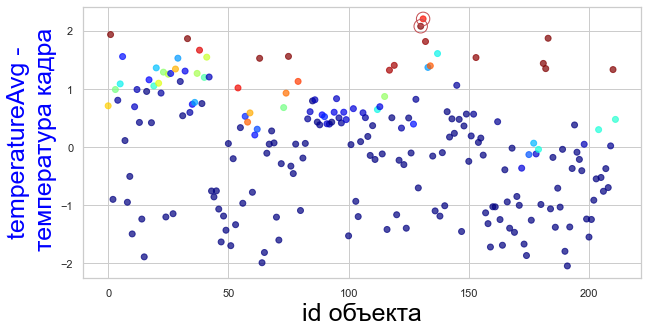

In [27]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(np.arange(start=0, stop=len(prediction)), x_sochi[:, 0], c=prediction, alpha=0.7, cmap = 'jet')
plot.scatter(130, [x_sochi[130, 0]], alpha=1, s = 180, edgecolors ='r', facecolors = 'none')
plot.scatter(131, [x_sochi[131, 0]], alpha=1, s = 180, edgecolors ='r', facecolors = 'none')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')